In [87]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from re import sub
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder, StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from umap import UMAP

In [88]:
train_df=pd.read_csv("../dataset/train.csv")
test_df=pd.read_csv("../dataset/test.csv")
data = train_df.drop(train_df.iloc[:, [0,1]], axis=1)

In [89]:
data["Arrival Delay in Minutes"].fillna(0.0,inplace=True)

In [90]:
# Replace spaces with underscores in column names
feature_names = data.columns.tolist()
data.columns = [sub(r'\s+', '_', col.strip()) for col in data.columns]

In [91]:
cat_vars = data.select_dtypes(include=['object']).copy()
cat_vars_names = cat_vars.columns
cat_vars_names

Index(['Gender', 'Customer_Type', 'Type_of_Travel', 'Class', 'satisfaction'], dtype='object')

In [92]:
for i in cat_vars_names:
    temp=str(pd.unique(cat_vars[i]))
    print(f"{i:<15}{temp:<30}")

Gender         ['Male' 'Female']             
Customer_Type  ['Loyal Customer' 'disloyal Customer']
Type_of_Travel ['Personal Travel' 'Business travel']
Class          ['Eco Plus' 'Business' 'Eco'] 
satisfaction   ['neutral or dissatisfied' 'satisfied']


In [93]:
class_lvls=["Eco","Eco Plus","Business"]
enc=OrdinalEncoder(categories=[class_lvls])
cat_vars["Class"]=enc.fit_transform(cat_vars[["Class"]]) 
cat_vars["Class"]=pd.to_numeric(cat_vars["Class"],downcast="integer") # float -> int
cat_vars["Class"].head()

0    1
1    2
2    2
3    2
4    2
Name: Class, dtype: int8

In [94]:
lab_enc_vars=cat_vars_names.drop("Class")
for i in lab_enc_vars:
    le=LabelEncoder()
    cat_vars[i]=le.fit_transform(cat_vars[i])

cat_vars.describe()

,Gender,Customer_Type,Type_of_Travel,Class,satisfaction
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000
mean,0.492541,0.182678,0.310373,1.028103,0.433333
std,0.499947,0.386404,0.462649,0.962858,0.495538
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,1.000000,2.000000,1.000000


In [95]:

num_vars = data[["Age", "Flight_Distance", "Departure_Delay_in_Minutes", "Arrival_Delay_in_Minutes"]].copy()

In [96]:
rate_vars = data.iloc[: ,6: 20].copy()
rate_vars

,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness
0,3,4,3,1,5,3,5,5,4,3,4,4,5,5
1,3,2,3,3,1,3,1,1,1,5,3,1,4,1
2,2,2,2,2,5,5,5,5,4,3,4,4,4,5
3,2,5,5,5,2,2,2,2,2,5,3,1,4,2
4,3,3,3,3,4,5,5,3,3,4,4,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,2,1,2,3,2,2,2,2,3,1,4,2,3,2
103900,4,4,4,4,2,4,5,5,5,5,5,5,5,4
103901,1,1,1,3,4,1,5,4,3,2,4,5,5,4
103902,1,1,1,5,1,1,1,1,4,5,1,5,4,1


In [97]:
final_df = pd.concat([cat_vars, rate_vars, num_vars], axis=1)
final_df.head()

,Gender,Customer_Type,Type_of_Travel,Class,satisfaction,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,...,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Age,Flight_Distance,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
0,1,0,1,1,0,3,4,3,1,5,...,4,3,4,4,5,5,13,460,25,18.0
1,1,1,0,2,0,3,2,3,3,1,...,1,5,3,1,4,1,25,235,1,6.0
2,0,0,0,2,1,2,2,2,2,5,...,4,3,4,4,4,5,26,1142,0,0.0
3,0,0,0,2,0,2,5,5,5,2,...,2,5,3,1,4,2,25,562,11,9.0
4,1,0,0,2,1,3,3,3,3,4,...,3,4,4,3,3,3,61,214,0,0.0


In [98]:
X = final_df.drop("satisfaction", axis=1)
y = final_df["satisfaction"]

In [99]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [100]:
umap_data = UMAP(n_neighbors=100, n_components=2, metric='euclidean', n_epochs=100, learning_rate=0.1, init='spectral',
                 min_dist=0.1, spread=1.0, low_memory=False, set_op_mix_ratio=1.0, local_connectivity=1,
                 repulsion_strength=1.0, negative_sample_rate=5, transform_queue_size=4.0, random_state=3,  
                 angular_rp_forest=False, target_n_neighbors=-1, transform_seed=3, verbose=False, unique=False)

In [101]:
X_umap = umap_data.fit_transform(X_scaled, y)

c:\Users\Tudor\anaconda3\envs\ml-standard-env\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


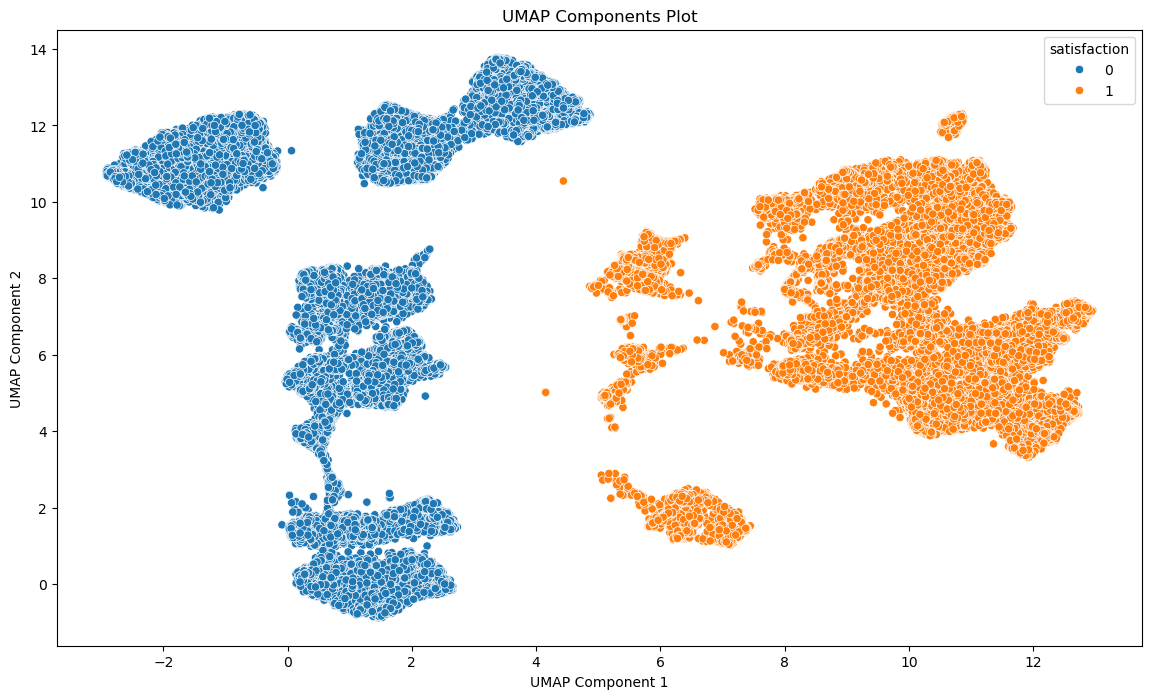

In [102]:
plt.figure(figsize=(14,8))
sns.scatterplot(x=X_umap[:,0], y=X_umap[:,1], hue=y)
plt.title('UMAP Components Plot')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.show()